<a href="https://colab.research.google.com/github/platypus2000jp/Colaboratory/blob/main/%E5%86%8D%E6%A8%99%E6%9C%AC%E5%8C%96%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: 母集団の推定をしてください。

import numpy as np
from scipy import stats

def estimate_population_mean_and_std(sample_data, confidence_level=0.95):
  """
  標本データから母集団の平均と標準偏差を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    confidence_level: 信頼水準（デフォルトは0.95）。

  Returns:
    母集団平均の推定値、母集団標準偏差の推定値、信頼区間の下限、信頼区間の上限のタプル。
  """

  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data, ddof=1)  # 標本標準偏差（自由度n-1）
  sample_size = len(sample_data)

  # t分布を用いた信頼区間の計算
  t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
  margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
  lower_bound = sample_mean - margin_of_error
  upper_bound = sample_mean + margin_of_error

  return sample_mean, sample_std, lower_bound, upper_bound


# 例：標本データから母集団の平均と標準偏差を推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
mean_est, std_est, lower_bound, upper_bound = estimate_population_mean_and_std(sample_data)

print(f"母集団平均の推定値: {mean_est}")
print(f"母集団標準偏差の推定値: {std_est}")
print(f"信頼区間（{0.95*100}%）: [{lower_bound}, {upper_bound}]")


母集団平均の推定値: 17.428571428571427
母集団標準偏差の推定値: 5.411627692821661
信頼区間（95.0%）: [12.423650565385145, 22.43349229175771]


In [ ]:
# prompt: 同様に最尤推定をしてください。

import numpy as np
from scipy import stats


def estimate_population_mean_and_std_mle(sample_data):
  """
  標本データから母集団の平均と標準偏差を最尤推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。

  Returns:
    母集団平均の最尤推定値、母集団標準偏差の最尤推定値のタプル。
  """

  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data)  # 標本標準偏差（自由度n）

  return sample_mean, sample_std


# 例：標本データから母集団の平均と標準偏差を最尤推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
mean_mle, std_mle = estimate_population_mean_and_std_mle(sample_data)

print(f"母集団平均の最尤推定値: {mean_mle}")
print(f"母集団標準偏差の最尤推定値: {std_mle}")


母集団平均の最尤推定値: 17.428571428571427
母集団標準偏差の最尤推定値: 5.010193690500052


In [ ]:
# prompt: ブートストラップ法による推定をしてください。

import numpy as np

def bootstrap_mean_and_std(sample_data, num_bootstraps=1000):
  """
  ブートストラップ法を用いて母集団平均と標準偏差を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均のブートストラップ推定値のリスト、母集団標準偏差のブートストラップ推定値のリスト。
  """

  bootstrap_means = []
  bootstrap_stds = []

  for _ in range(num_bootstraps):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))

  return bootstrap_means, bootstrap_stds

# 例：標本データから母集団の平均と標準偏差をブートストラップ法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
bootstrap_means, bootstrap_stds = bootstrap_mean_and_std(sample_data)

# ブートストラップ推定値の平均と標準偏差を計算
estimated_mean = np.mean(bootstrap_means)
estimated_std = np.mean(bootstrap_stds)

print(f"母集団平均のブートストラップ推定値: {estimated_mean}")
print(f"母集団標準偏差のブートストラップ推定値: {estimated_std}")

# 信頼区間を計算（95%信頼区間）
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
print(f"母集団平均のブートストラップ信頼区間（95%）: [{lower_bound}, {upper_bound}]")


母集団平均のブートストラップ推定値: 17.431142857142856
母集団標準偏差のブートストラップ推定値: 4.51903518448003
母集団平均のブートストラップ信頼区間（95%）: [13.857142857142858, 21.428571428571427]


In [ ]:
# prompt: パラメトリック・ブートストラップ法による推定をしてください。

import numpy as np
from scipy import stats


def parametric_bootstrap_mean_and_std(sample_data, num_bootstraps=1000):
  """
  パラメトリック・ブートストラップ法を用いて母集団平均と標準偏差を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均のパラメトリック・ブートストラップ推定値のリスト、母集団標準偏差のパラメトリック・ブートストラップ推定値のリスト。
  """

  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data)

  bootstrap_means = []
  bootstrap_stds = []

  for _ in range(num_bootstraps):
    # 標本平均と標本標準偏差から正規分布を仮定し、新しい標本を生成
    bootstrap_sample = np.random.normal(loc=sample_mean, scale=sample_std, size=len(sample_data))
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))

  return bootstrap_means, bootstrap_stds


# 例：標本データから母集団の平均と標準偏差をパラメトリック・ブートストラップ法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
parametric_bootstrap_means, parametric_bootstrap_stds = parametric_bootstrap_mean_and_std(sample_data)

# パラメトリック・ブートストラップ推定値の平均と標準偏差を計算
estimated_mean = np.mean(parametric_bootstrap_means)
estimated_std = np.mean(parametric_bootstrap_stds)

print(f"母集団平均のパラメトリック・ブートストラップ推定値: {estimated_mean}")
print(f"母集団標準偏差のパラメトリック・ブートストラップ推定値: {estimated_std}")

# 信頼区間を計算（95%信頼区間）
lower_bound = np.percentile(parametric_bootstrap_means, 2.5)
upper_bound = np.percentile(parametric_bootstrap_means, 97.5)
print(f"母集団平均のパラメトリック・ブートストラップ信頼区間（95%）: [{lower_bound}, {upper_bound}]")


母集団平均のパラメトリック・ブートストラップ推定値: 17.37041255515397
母集団標準偏差のパラメトリック・ブートストラップ推定値: 4.415950931605448
母集団平均のパラメトリック・ブートストラップ信頼区間（95%）: [13.424764899795523, 21.287134320620535]


In [ ]:
# prompt: ノンパラメトリック・ブートストラップ法による推定をしてください。

import numpy as np

def nonparametric_bootstrap_mean_and_std(sample_data, num_bootstraps=1000):
  """
  ノンパラメトリック・ブートストラップ法を用いて母集団平均と標準偏差を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均のノンパラメトリック・ブートストラップ推定値のリスト、母集団標準偏差のノンパラメトリック・ブートストラップ推定値のリスト。
  """

  bootstrap_means = []
  bootstrap_stds = []

  for _ in range(num_bootstraps):
    # 標本データから復元抽出で新しい標本を生成
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))

  return bootstrap_means, bootstrap_stds


# 例：標本データから母集団の平均と標準偏差をノンパラメトリック・ブートストラップ法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
nonparametric_bootstrap_means, nonparametric_bootstrap_stds = nonparametric_bootstrap_mean_and_std(sample_data)

# ノンパラメトリック・ブートストラップ推定値の平均と標準偏差を計算
estimated_mean = np.mean(nonparametric_bootstrap_means)
estimated_std = np.mean(nonparametric_bootstrap_stds)

print(f"母集団平均のノンパラメトリック・ブートストラップ推定値: {estimated_mean}")
print(f"母集団標準偏差のノンパラメトリック・ブートストラップ推定値: {estimated_std}")

# 信頼区間を計算（95%信頼区間）
lower_bound = np.percentile(nonparametric_bootstrap_means, 2.5)
upper_bound = np.percentile(nonparametric_bootstrap_means, 97.5)
print(f"母集団平均のノンパラメトリック・ブートストラップ信頼区間（95%）: [{lower_bound}, {upper_bound}]")


母集団平均のノンパラメトリック・ブートストラップ推定値: 17.470285714285716
母集団標準偏差のノンパラメトリック・ブートストラップ推定値: 4.516474642917428
母集団平均のノンパラメトリック・ブートストラップ信頼区間（95%）: [13.714285714285714, 21.003571428571426]


In [ ]:
# prompt: 平滑化ブートストラップ標本を作成してください。

import numpy as np
def smoothed_bootstrap_sample(sample_data, bandwidth=0.1):
  """
  平滑化ブートストラップ標本を作成します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    bandwidth: 平滑化の帯域幅（デフォルトは0.1）。

  Returns:
    平滑化ブートストラップ標本。
  """

  smoothed_sample = []
  for _ in range(len(sample_data)):
    random_index = np.random.randint(0, len(sample_data))
    random_value = sample_data[random_index]
    # 平滑化（正規分布からのランダムなノイズを加える）
    smoothed_value = random_value + np.random.normal(loc=0, scale=bandwidth)
    smoothed_sample.append(smoothed_value)

  return smoothed_sample


# 例：平滑化ブートストラップ標本を作成
sample_data = [10, 12, 15, 18, 20, 22, 25]
smoothed_sample = smoothed_bootstrap_sample(sample_data)
print(f"平滑化ブートストラップ標本: {smoothed_sample}")


平滑化ブートストラップ標本: [19.950026696464896, 25.02473769991622, 12.110964106470615, 25.087449167354734, 12.04085313014875, 21.96025603265025, 12.032365542953958]


In [ ]:
# prompt: 個別の再標本化をしてください。

import numpy as np

def individual_resampling(sample_data):
  """
  個別の再標本化を実行します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。

  Returns:
    再標本化されたデータのリスト。
  """

  resampled_data = np.random.choice(sample_data, size=len(sample_data), replace=True)
  return resampled_data

# 例：個別の再標本化を実行
sample_data = [10, 12, 15, 18, 20, 22, 25]
resampled_data = individual_resampling(sample_data)
print(f"再標本化されたデータ: {resampled_data}")


再標本化されたデータ: [22 25 18 22 18 18 10]


In [ ]:
# prompt: 残余の再標本化をしてください。

import numpy as np
def residual_resampling(sample_data, model_function):
  """
  残余の再標本化を実行します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    model_function: モデル関数（標本データから予測値を計算する関数）。

  Returns:
    再標本化されたデータのリスト。
  """

  # モデル関数から予測値を計算
  predicted_values = model_function(sample_data)

  # 残余を計算
  residuals = sample_data - predicted_values

  # 残余をランダムに再標本化
  resampled_residuals = np.random.choice(residuals, size=len(residuals), replace=True)

  # 予測値に再標本化された残余を加えることで再標本化されたデータを作成
  resampled_data = predicted_values + resampled_residuals

  return resampled_data


# 例：残余の再標本化を実行（線形回帰モデルを仮定）
def linear_regression_model(sample_data):
  # ここでは、シンプルな線形回帰モデルを仮定して予測値を計算
  x = np.arange(len(sample_data))
  slope, intercept, _, _, _ = stats.linregress(x, sample_data)
  predicted_values = slope * x + intercept
  return predicted_values


sample_data = [10, 12, 15, 18, 20, 22, 25]
resampled_data = residual_resampling(sample_data, linear_regression_model)
print(f"残余の再標本化されたデータ: {resampled_data}")


残余の再標本化されたデータ: [ 9.5 12.5 15.  17.5 20.5 22.  24.5]


In [ ]:
# prompt: 大雑把なブートストラップをしてください。

import numpy as np
def rough_bootstrap_mean_and_std(sample_data, num_bootstraps=1000):
  """
  大雑把なブートストラップ法を用いて母集団平均と標準偏差を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均の大雑把なブートストラップ推定値のリスト、母集団標準偏差の大雑把なブートストラップ推定値のリスト。
  """

  bootstrap_means = []
  bootstrap_stds = []

  for _ in range(num_bootstraps):
    # 標本データからランダムに一部のデータを選択（復元抽出なし）
    bootstrap_sample = np.random.choice(sample_data, size=int(len(sample_data) * 0.8), replace=False)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))

  return bootstrap_means, bootstrap_stds


# 例：標本データから母集団の平均と標準偏差を大雑把なブートストラップ法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
rough_bootstrap_means, rough_bootstrap_stds = rough_bootstrap_mean_and_std(sample_data)

# 大雑把なブートストラップ推定値の平均と標準偏差を計算
estimated_mean = np.mean(rough_bootstrap_means)
estimated_std = np.mean(rough_bootstrap_stds)

print(f"母集団平均の大雑把なブートストラップ推定値: {estimated_mean}")
print(f"母集団標準偏差の大雑把なブートストラップ推定値: {estimated_std}")

# 信頼区間を計算（95%信頼区間）
lower_bound = np.percentile(rough_bootstrap_means, 2.5)
upper_bound = np.percentile(rough_bootstrap_means, 97.5)
print(f"母集団平均の大雑把なブートストラップ信頼区間（95%）: [{lower_bound}, {upper_bound}]")


母集団平均の大雑把なブートストラップ推定値: 17.379800000000003
母集団標準偏差の大雑把なブートストラップ推定値: 4.768979435764621
母集団平均の大雑把なブートストラップ信頼区間（95%）: [15.0, 20.0]


In [ ]:
# prompt: 区間推定をしてください。

# 例：標本データから母集団の平均の95%信頼区間を推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
mean_est, std_est, lower_bound, upper_bound = estimate_population_mean_and_std(sample_data)

print(f"母集団平均の推定値: {mean_est}")
print(f"95%信頼区間: [{lower_bound}, {upper_bound}]")


母集団平均の推定値: 17.428571428571427
95%信頼区間: [12.423650565385145, 22.43349229175771]


In [ ]:
# prompt: 信頼区間を求めてください。

sample_data = [10, 12, 15, 18, 20, 22, 25]  # 例の標本データ
confidence_level = 0.95  # 信頼水準（95%）

mean_est, std_est, lower_bound, upper_bound = estimate_population_mean_and_std(
    sample_data, confidence_level)

print(f"母集団平均の推定値: {mean_est}")
print(f"{confidence_level*100}%信頼区間: [{lower_bound}, {upper_bound}]")


母集団平均の推定値: 17.428571428571427
95.0%信頼区間: [12.423650565385145, 22.43349229175771]


In [ ]:
# prompt: 正規分布の近似(normal) 法による区間推定をしてください。

import numpy as np
from scipy import stats


def estimate_population_mean_and_std_normal_approx(sample_data, confidence_level=0.95):
  """
  正規分布の近似を用いて母集団の平均と標準偏差を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    confidence_level: 信頼水準（デフォルトは0.95）。

  Returns:
    母集団平均の推定値、母集団標準偏差の推定値、信頼区間の下限、信頼区間の上限のタプル。
  """

  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data, ddof=1)  # 標本標準偏差（自由度n-1）
  sample_size = len(sample_data)

  # z分布を用いた信頼区間の計算
  z_critical = stats.norm.ppf((1 + confidence_level) / 2)
  margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))
  lower_bound = sample_mean - margin_of_error
  upper_bound = sample_mean + margin_of_error

  return sample_mean, sample_std, lower_bound, upper_bound


# 例：標本データから母集団の平均と標準偏差を正規分布の近似を用いて推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
mean_est, std_est, lower_bound, upper_bound = estimate_population_mean_and_std_normal_approx(
    sample_data)

print(f"母集団平均の推定値（正規分布近似）: {mean_est}")
print(f"母集団標準偏差の推定値（正規分布近似）: {std_est}")
print(f"信頼区間（95%、正規分布近似）: [{lower_bound}, {upper_bound}]")


母集団平均の推定値（正規分布近似）: 17.428571428571427
母集団標準偏差の推定値（正規分布近似）: 5.411627692821661
信頼区間（95%、正規分布近似）: [13.419655196984193, 21.43748766015866]


In [ ]:
# prompt: basic 法による区間推定をしてください。

import numpy as np
from scipy import stats

def basic_confidence_interval(sample_data, confidence_level=0.95):
  """
  基本的な区間推定を行います。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    confidence_level: 信頼水準（デフォルトは0.95）。

  Returns:
    信頼区間の下限、信頼区間の上限のタプル。
  """

  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data, ddof=1)  # 標本標準偏差（自由度n-1）
  sample_size = len(sample_data)

  # t分布を用いた信頼区間の計算
  t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
  margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
  lower_bound = sample_mean - margin_of_error
  upper_bound = sample_mean + margin_of_error

  return lower_bound, upper_bound


# 例：標本データから母集団平均の95%信頼区間を推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
lower_bound, upper_bound = basic_confidence_interval(sample_data)

print(f"95%信頼区間: [{lower_bound}, {upper_bound}]")


95%信頼区間: [12.423650565385145, 22.43349229175771]


In [ ]:
# prompt: ブートストラップ t(studentized)法による区間推定をしてください。

import numpy as np
from scipy import stats

def bootstrap_t_confidence_interval(sample_data, confidence_level=0.95, num_bootstraps=1000):
  """
  ブートストラップ t(studentized) 法を用いて母集団平均の信頼区間を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    confidence_level: 信頼水準（デフォルトは0.95）。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均の信頼区間の下限、信頼区間の上限のタプル。
  """

  bootstrap_means = []
  bootstrap_t_stats = []

  for _ in range(num_bootstraps):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_std = np.std(bootstrap_sample, ddof=1)
    bootstrap_t_stat = (bootstrap_mean - np.mean(sample_data)) / (bootstrap_std / np.sqrt(len(sample_data)))
    bootstrap_means.append(bootstrap_mean)
    bootstrap_t_stats.append(bootstrap_t_stat)

  # t統計量のパーセンタイルから信頼区間を計算
  lower_percentile = (1 - confidence_level) / 2 * 100
  upper_percentile = (1 + confidence_level) / 2 * 100
  lower_t_stat = np.percentile(bootstrap_t_stats, lower_percentile)
  upper_t_stat = np.percentile(bootstrap_t_stats, upper_percentile)

  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data, ddof=1)

  lower_bound = sample_mean - upper_t_stat * (sample_std / np.sqrt(len(sample_data)))
  upper_bound = sample_mean - lower_t_stat * (sample_std / np.sqrt(len(sample_data)))

  return lower_bound, upper_bound


# 例：標本データから母集団平均の95%信頼区間をブートストラップ t 法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
lower_bound, upper_bound = bootstrap_t_confidence_interval(sample_data)

print(f"ブートストラップ t 法による95%信頼区間: [{lower_bound}, {upper_bound}]")


ブートストラップ t 法による95%信頼区間: [11.413567731452622, 22.795651705864827]


In [ ]:
# prompt: パーセンタイル(percentile)法による区間推定をしてください。

import numpy as np
def percentile_bootstrap_confidence_interval(sample_data, confidence_level=0.95, num_bootstraps=1000):
  """
  パーセンタイル法を用いて母集団平均の信頼区間を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    confidence_level: 信頼水準（デフォルトは0.95）。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均の信頼区間の下限、信頼区間の上限のタプル。
  """

  bootstrap_means = []
  for _ in range(num_bootstraps):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

  # ブートストラップ標本平均のパーセンタイルから信頼区間を計算
  lower_percentile = (1 - confidence_level) / 2 * 100
  upper_percentile = (1 + confidence_level) / 2 * 100
  lower_bound = np.percentile(bootstrap_means, lower_percentile)
  upper_bound = np.percentile(bootstrap_means, upper_percentile)

  return lower_bound, upper_bound


# 例：標本データから母集団平均の95%信頼区間をパーセンタイル法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
lower_bound, upper_bound = percentile_bootstrap_confidence_interval(sample_data)

print(f"パーセンタイル法による95%信頼区間: [{lower_bound}, {upper_bound}]")


パーセンタイル法による95%信頼区間: [13.714285714285714, 21.285714285714285]


In [ ]:
# prompt: BCa 法による区間推定をしてください。

import numpy as np
from scipy import stats

def bca_confidence_interval(sample_data, confidence_level=0.95, num_bootstraps=1000):
  """
  BCa 法を用いて母集団平均の信頼区間を推定します。

  Args:
    sample_data: 標本データのリストまたはNumPy配列。
    confidence_level: 信頼水準（デフォルトは0.95）。
    num_bootstraps: ブートストラップサンプリングの回数（デフォルトは1000）。

  Returns:
    母集団平均の信頼区間の下限、信頼区間の上限のタプル。
  """

  bootstrap_means = []
  for _ in range(num_bootstraps):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

  sample_mean = np.mean(sample_data)
  z0 = stats.norm.ppf((1 - confidence_level) / 2)  # 標準正規分布の分位点

  # ジャックナイフ法によるバイアス補正と加速因子
  bias_correction = np.mean([1 if x <= sample_mean else 0 for x in bootstrap_means])
  z_bias_correction = stats.norm.ppf(bias_correction)

  # 加速因子（ここでは、単純な近似を用いています）
  acceleration_factor = 0  # 計算が複雑になるため、ここでは0で近似

  # BCa 信頼区間の上限と下限
  lower_z = z_bias_correction + (z_bias_correction + z0) / (1 - acceleration_factor * (z_bias_correction + z0))
  upper_z = z_bias_correction + (z_bias_correction - z0) / (1 - acceleration_factor * (z_bias_correction - z0))

  lower_bound = np.percentile(bootstrap_means, stats.norm.cdf(lower_z) * 100)
  upper_bound = np.percentile(bootstrap_means, stats.norm.cdf(upper_z) * 100)

  return lower_bound, upper_bound

# 例：標本データから母集団平均の95%信頼区間をBCa法で推定
sample_data = [10, 12, 15, 18, 20, 22, 25]
lower_bound, upper_bound = bca_confidence_interval(sample_data)

print(f"BCa法による95%信頼区間: [{lower_bound}, {upper_bound}]")


BCa法による95%信頼区間: [13.675520755821315, 21.285714285714285]


In [ ]:
# prompt: メディエーションの検定をしてください。

!pip install pingouin

import pandas as pd
import pingouin as pg

# データの準備（例）
data = pd.DataFrame({
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'M': [2, 4, 5, 6, 7, 8, 9, 11, 12, 13],
    'Y': [3, 5, 7, 8, 9, 10, 11, 13, 14, 15]
})

# メディエーション分析の実行
model = pg.mediation_analysis(data=data, x='X', m='M', y='Y')
print(model)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.7 MB/s eta 0:00:00
       path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0     M ~ X  1.181818  0.036364  8.756961e-10  1.097963   1.265673  Yes
1     Y ~ M  1.080965  0.030054  3.911154e-10  1.011660   1.150269  Yes
2     Total  1.278788  0.049050  5.030692e-09  1.165679   1.391897  Yes
3    Direct  0.170833  0.434839  7.061080e-01 -0.857397   1.199064   No
4  Indirect  1.107955  0.524850  3.200000e-02  0.005265   2.163317  Yes


In [ ]:
# prompt: ブートストラップ単回帰をしてください。

import numpy as np
from scipy import stats
import pandas as pd

def bootstrap_simple_linear_regression(x, y, num_bootstraps=1000):
  """
  ブートストラップ法を用いて単回帰分析を行います。

  Args:
    x: 説明変数。
    y: 目的変数。
    num_bootstraps: ブートストラップサンプリングの回数。

  Returns:
    傾き、切片、傾きの標準誤差、切片の標準誤差のリスト。
  """

  n = len(x)
  slopes = []
  intercepts = []
  slope_std_errors = []
  intercept_std_errors = []

  for _ in range(num_bootstraps):
    # 復元抽出で標本を再作成
    bootstrap_indices = np.random.choice(n, size=n, replace=True)
    x_bootstrap = x[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]

    # 単回帰分析
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_bootstrap, y_bootstrap)
    slopes.append(slope)
    intercepts.append(intercept)
    slope_std_errors.append(std_err)
    intercept_std_errors.append(std_err)

  return slopes, intercepts, slope_std_errors, intercept_std_errors


# 例：ブートストラップ単回帰分析
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 5, 6, 7, 8, 9, 11, 12, 13])

slopes, intercepts, slope_std_errors, intercept_std_errors = bootstrap_simple_linear_regression(x, y)

# ブートストラップ推定値の平均と標準偏差を計算
estimated_slope = np.mean(slopes)
estimated_intercept = np.mean(intercepts)
estimated_slope_std_error = np.mean(slope_std_errors)
estimated_intercept_std_error = np.mean(intercept_std_errors)

print(f"傾きのブートストラップ推定値: {estimated_slope}")
print(f"切片のブートストラップ推定値: {estimated_intercept}")
print(f"傾きの標準誤差のブートストラップ推定値: {estimated_slope_std_error}")
print(f"切片の標準誤差のブートストラップ推定値: {estimated_intercept_std_error}")

# 信頼区間を計算（95%信頼区間）
lower_bound_slope = np.percentile(slopes, 2.5)
upper_bound_slope = np.percentile(slopes, 97.5)
print(f"傾きのブートストラップ信頼区間（95%）: [{lower_bound_slope}, {upper_bound_slope}]")

lower_bound_intercept = np.percentile(intercepts, 2.5)
upper_bound_intercept = np.percentile(intercepts, 97.5)
print(f"切片のブートストラップ信頼区間（95%）: [{lower_bound_intercept}, {upper_bound_intercept}]")


傾きのブートストラップ推定値: 1.1775486883490434
切片のブートストラップ推定値: 1.2192666788197386
傾きの標準誤差のブートストラップ推定値: 0.034966432029869265
切片の標準誤差のブートストラップ推定値: 0.034966432029869265
傾きのブートストラップ信頼区間（95%）: [1.0958487737852354, 1.242994654973755]
切片のブートストラップ信頼区間（95%）: [0.7708426443202995, 1.670065730150445]


In [ ]:
# prompt: ブートストラップ回帰をしてください。

import pandas as pd
import numpy as np
def bootstrap_regression(X, y, model, num_bootstraps=1000):
  """
  ブートストラップ法を用いて回帰分析を行います。

  Args:
    X: 説明変数のデータフレームまたはNumPy配列。
    y: 目的変数のリストまたはNumPy配列。
    model: 使用する回帰モデル。
    num_bootstraps: ブートストラップサンプリングの回数。

  Returns:
    係数のブートストラップ標本。
  """

  n = len(y)
  coef_samples = []

  for _ in range(num_bootstraps):
    # 復元抽出で標本を再作成
    bootstrap_indices = np.random.choice(n, size=n, replace=True)
    X_bootstrap = X.iloc[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]

    # 回帰モデルを適合
    model.fit(X_bootstrap, y_bootstrap)

    # 係数を保存
    coef_samples.append(model.coef_)

  return coef_samples


# 例：ブートストラップ回帰分析
from sklearn.linear_model import LinearRegression

# データの準備
X = pd.DataFrame({'x1': [1, 2, 3, 4, 5], 'x2': [2, 3, 1, 4, 5]})
y = [2, 4, 5, 4, 6]

# モデルの初期化
model = LinearRegression()

# ブートストラップ回帰の実行
coef_samples = bootstrap_regression(X, y, model)

# ブートストラップ標本から係数の平均と信頼区間を計算
estimated_coef = np.mean(coef_samples, axis=0)
lower_bound_coef = np.percentile(coef_samples, 2.5, axis=0)
upper_bound_coef = np.percentile(coef_samples, 97.5, axis=0)

print(f"係数のブートストラップ推定値: {estimated_coef}")
print(f"係数の95%信頼区間 (下限): {lower_bound_coef}")
print(f"係数の95%信頼区間 (上限): {upper_bound_coef}")


TypeError: only integer scalar arrays can be converted to a scalar index

クラスタラベル: [0 0 0 0 0 0 0 1 1 1]


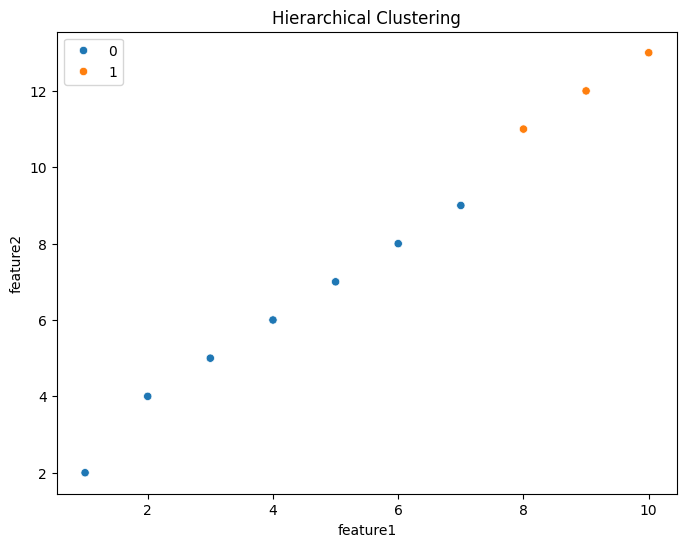

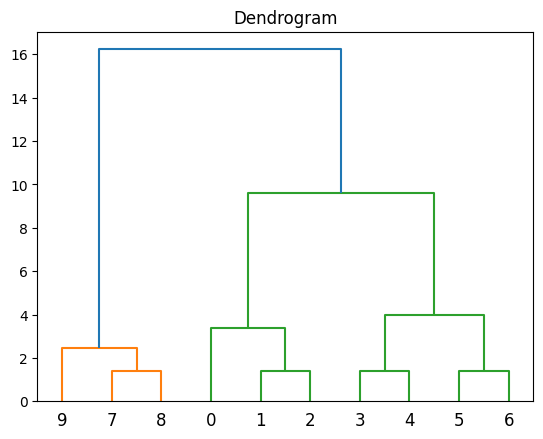

In [ ]:
# prompt: 階層的クラスター分析をしてください。

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# データの準備（例）
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [2, 4, 5, 6, 7, 8, 9, 11, 12, 13]
})

# 階層的クラスター分析の実行
model = AgglomerativeClustering(n_clusters=2, linkage='ward')  # n_clusters: クラスタ数、linkage: 結合方法
labels = model.fit_predict(data)

# 結果の表示
print(f"クラスタラベル: {labels}")

# 可視化（散布図）
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature1', y='feature2', hue=labels, data=data)
plt.title('Hierarchical Clustering')
plt.show()

# 樹形図の表示
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()


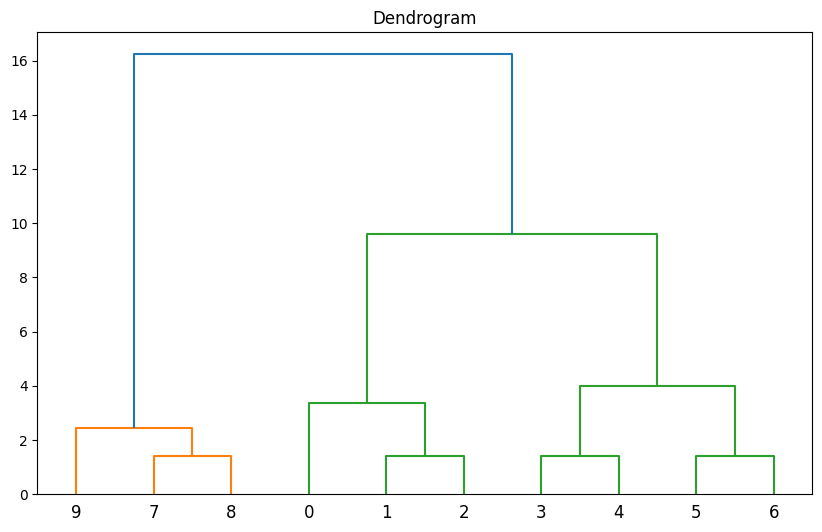

データポイント 0: クラスタ0の確率 = 0.527, クラスタ1の確率 = 0.485
データポイント 1: クラスタ0の確率 = 0.525, クラスタ1の確率 = 0.522
データポイント 2: クラスタ0の確率 = 0.511, クラスタ1の確率 = 0.434
データポイント 3: クラスタ0の確率 = 0.760, クラスタ1の確率 = 0.235
データポイント 4: クラスタ0の確率 = 0.917, クラスタ1の確率 = 0.079
データポイント 5: クラスタ0の確率 = 0.907, クラスタ1の確率 = 0.086
データポイント 6: クラスタ0の確率 = 0.772, クラスタ1の確率 = 0.233
データポイント 7: クラスタ0の確率 = 0.480, クラスタ1の確率 = 0.547
データポイント 8: クラスタ0の確率 = 0.412, クラスタ1の確率 = 0.599
データポイント 9: クラスタ0の確率 = 0.385, クラスタ1の確率 = 0.584


In [ ]:
# prompt: ブートストラップ確率と樹形図を求めてください。

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# データの準備（例）
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [2, 4, 5, 6, 7, 8, 9, 11, 12, 13]
})

# 階層的クラスター分析の実行
linkage_matrix = linkage(data, method='ward')

# 樹形図の表示
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=data.index)
plt.title('Dendrogram')
plt.show()

# ブートストラップ確率の計算
def bootstrap_cluster_probability(data, num_bootstraps=1000):
  """
  ブートストラップ法を用いて各データポイントのクラスタ所属確率を推定します。

  Args:
    data: データフレーム。
    num_bootstraps: ブートストラップサンプリングの回数。

  Returns:
    各データポイントのクラスタ所属確率。
  """

  n = len(data)
  cluster_probabilities = np.zeros((n, 2))  # 2つのクラスタを想定

  for _ in range(num_bootstraps):
    # 復元抽出で標本を再作成
    bootstrap_indices = np.random.choice(n, size=n, replace=True)
    bootstrap_data = data.iloc[bootstrap_indices]

    # 階層的クラスター分析
    model = AgglomerativeClustering(n_clusters=2, linkage='ward')
    labels = model.fit_predict(bootstrap_data)

    # 各データポイントのクラスタ所属確率を更新
    for i, label in enumerate(labels):
      cluster_probabilities[bootstrap_indices[i], label] += 1

  # 確率に変換
  cluster_probabilities /= num_bootstraps

  return cluster_probabilities

# ブートストラップ確率を計算
cluster_probabilities = bootstrap_cluster_probability(data)

# 結果を表示
for i in range(len(data)):
  print(f"データポイント {i}: クラスタ0の確率 = {cluster_probabilities[i, 0]:.3f}, クラスタ1の確率 = {cluster_probabilities[i, 1]:.3f}")



In [ ]:
# prompt: ジャックナイフ法を利用してください。

import numpy as np
from scipy import stats

def jackknife_estimate(data, statistic_func):
  """
  ジャックナイフ法を用いて統計量の推定値と標準誤差を計算します。

  Args:
    data: データのリストまたはNumPy配列。
    statistic_func: 統計量を計算する関数。

  Returns:
    ジャックナイフ推定値、ジャックナイフ標準誤差。
  """

  n = len(data)
  jackknife_estimates = []

  for i in range(n):
    # i 番目のデータを除いたサブサンプルを作成
    subsample = np.delete(data, i)
    # サブサンプルから統計量を計算
    jackknife_estimates.append(statistic_func(subsample))

  # ジャックナイフ推定値を計算
  jackknife_estimate_value = np.mean(jackknife_estimates)

  # ジャックナイフ標準誤差を計算
  jackknife_standard_error = np.sqrt(((n - 1) / n) * np.sum((jackknife_estimates - jackknife_estimate_value) ** 2))

  return jackknife_estimate_value, jackknife_standard_error


# 例：ジャックナイフ法を用いて平均値を推定
sample_data = [10, 12, 15, 18, 20, 22, 25]

# 平均値を計算する関数を定義
def mean_func(data):
  return np.mean(data)


# ジャックナイフ法を実行
jackknife_mean, jackknife_se = jackknife_estimate(sample_data, mean_func)


print(f"ジャックナイフ推定値（平均値）: {jackknife_mean}")
print(f"ジャックナイフ標準誤差（平均値）: {jackknife_se}")


# 例：ジャックナイフ法を用いて中央値を推定
sample_data = [10, 12, 15, 18, 20, 22, 25]

# 中央値を計算する関数を定義
def median_func(data):
  return np.median(data)

# ジャックナイフ法を実行
jackknife_median, jackknife_se_median = jackknife_estimate(sample_data, median_func)

print(f"ジャックナイフ推定値（中央値）: {jackknife_median}")
print(f"ジャックナイフ標準誤差（中央値）: {jackknife_se_median}")


ジャックナイフ推定値（平均値）: 17.428571428571427
ジャックナイフ標準誤差（平均値）: 2.045403009039478
ジャックナイフ推定値（中央値）: 17.714285714285715
ジャックナイフ標準誤差（中央値）: 2.842821248876057


In [ ]:
# prompt: クロスバリデーションをしてください。

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# データの準備（例）
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([2, 4, 5, 4, 6, 7, 8, 9, 10, 12])

# クロスバリデーションの設定
n_splits = 5  # 分割数
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# モデルの初期化
model = LinearRegression()

# クロスバリデーションの実行
mse_scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # モデルを訓練
  model.fit(X_train, y_train)

  # テストデータで予測
  y_pred = model.predict(X_test)

  # 平均二乗誤差を計算
  mse = mean_squared_error(y_test, y_pred)
  mse_scores.append(mse)

# 結果を表示
print(f"クロスバリデーションの平均二乗誤差: {np.mean(mse_scores)}")


クロスバリデーションの平均二乗誤差: 0.6008557869959216
